# 第11回：データを分析する

目標：「**商品の購買データと顧客データを組み合わせ，購買分析を行います**」



## データの準備

今回使用するデータをGoogle DriveにアップしてColab上で利用できるようにします．  
今回使用するデータは「data_analysis.zip」として配布します．  
配布場所は[Moodle](https://moodle2023.shonan-it.ac.jp/mod/resource/view.php?id=53925)もしくは[github](https://github.com/shimizu-sit/2023-SIT-SCfCL/blob/main/11th-Lecture/data_analysis.zip)からダウンロードしてください．  
ダウンロードしたZIPファイルを展開（解凍）して，そのフォルダごとGoogle Driveの作業場所にアップしてください．

## ライブラリ等のインポート
pandasなどをインポートする

In [ ]:
import pandas as pd

## データの読み込み

顧客データ（customer.csv） を読み込み，IDの上から5名の情報を表示する

In [ ]:
customer_path = '/content/drive/MyDrive/SIT_2023/SCfCL/data_analysis/customer.csv'

customer = pd.read_csv(customer_path)
customer.head()

,顧客ID,顧客名,性別,年齢
0,1,田中,男,21
1,2,斎藤,女,32
2,3,山田,女,56
3,4,佐藤,男,43
4,5,北野,男,23


## データの結合方法

以下の2つの結合方法について解説する
- データを縦方向に結合する処理
- 特定の列をキーにして横方向にデータを結合する処理


### データを縦方向に結合

`concat()`関数を使用してデータを縦方向に結合する．
`ignore_index=True`で結合後のデータにインデックスを作成する．

In [ ]:
path = '/content/drive/MyDrive/SIT_2023/SCfCL/data_analysis/'

transaction_1 = pd.read_csv(path + 'transaction_1.csv')
transaction_2 = pd.read_csv(path + 'transaction_2.csv')

transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)

transaction

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数
0,1,2020/01/01,1,100,2,1
1,2,2020/01/01,1,200,2,2
2,3,2020/01/03,5,100,6,1
3,4,2020/01/04,5,500,4,2
4,5,2020/01/10,7,100,1,1
5,6,2020/01/11,2,250,4,1
6,7,2020/01/13,3,300,5,1
7,8,2020/01/18,2,500,5,2
8,9,2020/02/01,6,200,3,1
9,10,2020/02/03,1,100,2,1


### 特定の列をキーにして横方向にデータを結合

`merge()`関数で特定のキーを元にデータを横に結合する
- transactionデータは顧客ID
- customerデータは顧客IDに紐づく顧客情報（顧客名，性別，年齢）
- 顧客IDをキーとして結合処理を行う

In [ ]:
sales_data = pd.merge(transaction, customer, on='顧客ID')

sales_data

,購買ID,購買日,顧客ID,購買金額,商品ID,購入数,顧客名,性別,年齢
0,1,2020/01/01,1,100,2,1,田中,男,21
1,2,2020/01/01,1,200,2,2,田中,男,21
2,10,2020/02/03,1,100,2,1,田中,男,21
3,12,2020/02/10,1,100,2,1,田中,男,21
4,13,2020/02/12,1,300,6,3,田中,男,21
5,3,2020/01/03,5,100,6,1,北野,男,23
6,4,2020/01/04,5,500,4,2,北野,男,23
7,5,2020/01/10,7,100,1,1,岡田,女,44
8,14,2020/02/18,7,100,6,1,岡田,女,44
9,15,2020/02/18,7,200,3,1,岡田,女,44


## データの集計

合計を求める
- データの集計作業を行う
- 顧客IDごとの合計購買金額と合計購入数を求める
- `merge`した`sales_data`データを使う
- `groupby()`メソッドを使って特定のキーを指定する
- 合計購買金額→「購買金額」
- 合計購入数→「購入数」
- 合計→`.sum()`


In [ ]:
sales_per_customer = sales_data.groupby('顧客ID')[['購買金額','購入数']].sum()

sales_per_customer

,購買金額,購入数
顧客ID,,
1,800,8
2,750,3
3,300,1
4,100,1
5,600,3
6,200,1
7,400,3


In [ ]:
sales_per_day = sales_data.groupby('購買日').購買金額.mean()

sales_per_day

購買日
2020/01/01    150.0
2020/01/03    100.0
2020/01/04    500.0
2020/01/10    100.0
2020/01/11    250.0
2020/01/13    300.0
2020/01/18    500.0
2020/02/01    200.0
2020/02/03    100.0
2020/02/08    100.0
2020/02/10    100.0
2020/02/12    300.0
2020/02/18    150.0
Name: 購買金額, dtype: float64

# データを可視化する

集計データを使ってグラフを作成します

使用するライブラリ
- Matplotlib
  - Pythonでグラフを描くための基本的なライブラリ
  - グラフの基本的な設定を行う
- seaborn
  - Matplotlibをベースにしたより複雑な可視化を簡単に行うことができるライブラリ


## ライブラリ等のインポート

matplotlib, seabornをインポートする

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

### 日本語フォントの使用について

- Matplotlibは日本語に対応していないので日本語を表示するためには日本語フォントを指定する必要があります
- japanize-matplotlibライブラリをインストールしてインポートします

In [ ]:
!pip install japanize_matplotlib
import japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e58c4126be4ff727930c7b5847aca60d7bdefb10549ea0d2aa75929ba4528ca6
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


`sales_per_customer` データを棒グラフにします．

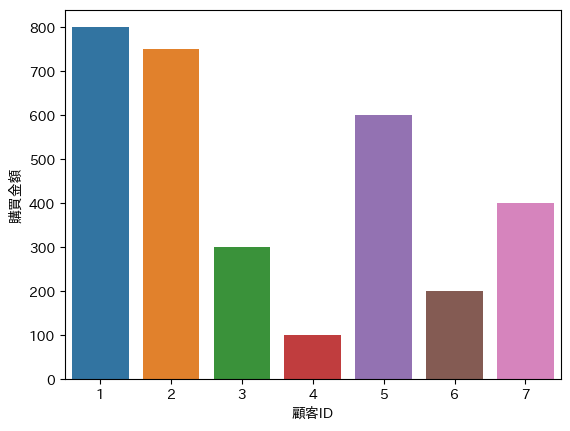

In [ ]:
ax = sns.barplot(x=sales_per_customer.index, y='購買金額', data=sales_per_customer)

`sales_per_day` データを折れ線グラフにします

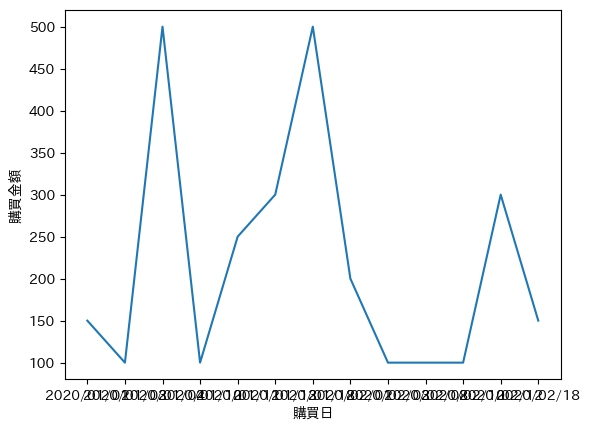

In [ ]:
ax = sns.lineplot(data=sales_per_day)

グラフの調整する

グラフをサイズを変更　→　'figsize'

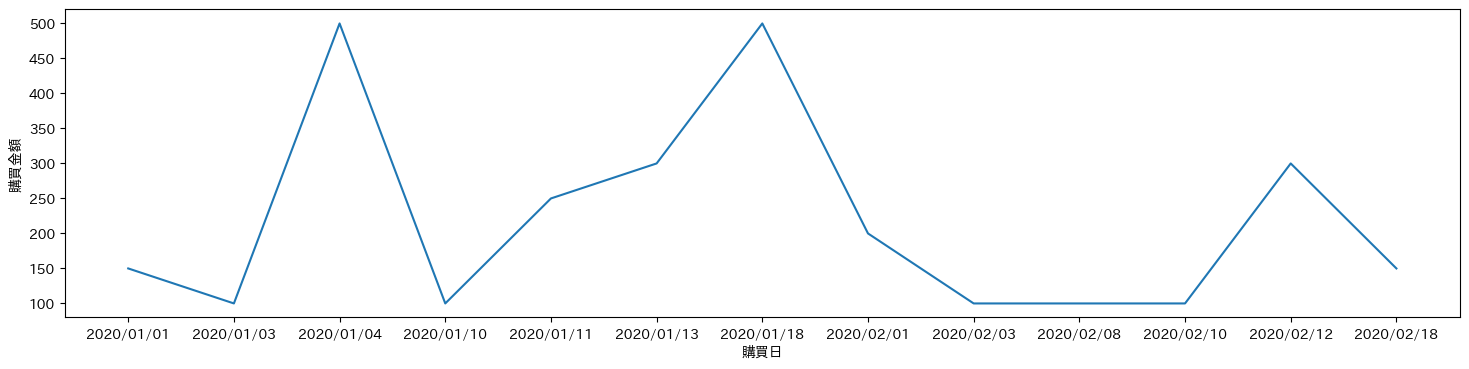

In [ ]:
plt.figure(figsize=(18,4))
ax = sns.lineplot(data=sales_per_day)

[Text(0.5, 0, '購買日'), Text(0, 0.5, '平均売上（円）')]

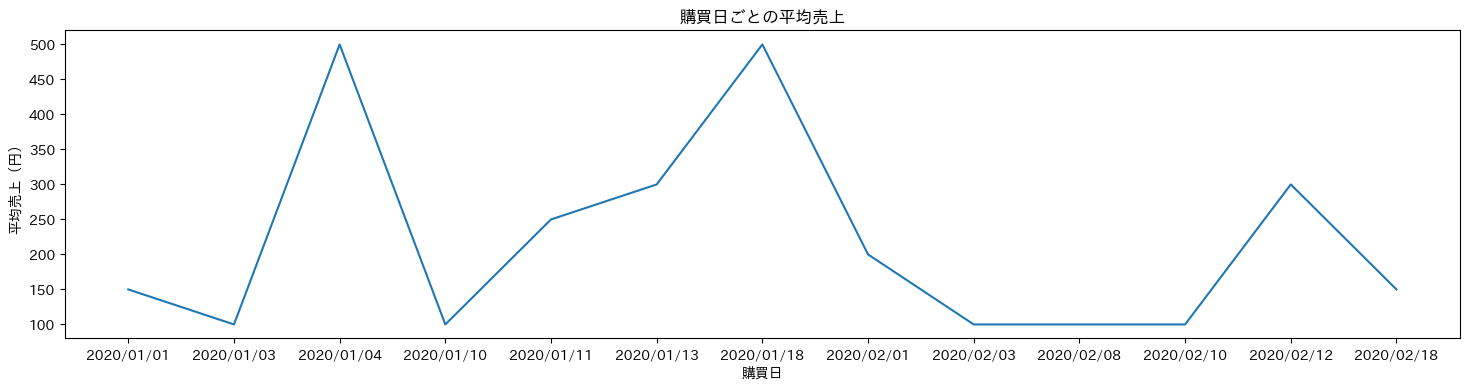

In [ ]:
plt.figure(figsize=(18,4))
ax = sns.lineplot(data=sales_per_day)
ax.set_title('購買日ごとの平均売上')
ax.set(xlabel='購買日', ylabel='平均売上（円）')